The following code is a simulation of a few stress-strain loops of a simple elasto-plastic material. The stress value is oscillated with with different amplitudes. The aim is to evaluate the dissipation between the loading and unloading phases, as well as the stress amplitude dependency of said dissipation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
from scipy.fft import fft, fftfreq, ifft
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LinearRegression

In [396]:
point= np.linspace(0,50*np.pi, num=10000) #datapoints/sample size
x=0.5*np.sin(point) #stress
dx=np.max(point)/(len(point)-1) #stress increment


In [397]:
yng=10  # Young's modulus
gm=10   #gamma, unloading modulus
coh=0.2  #Cohesion
eps=[0] # strain initialization
bs=[0]  #back stress initialization
print(bs[0], len(eps))


0 1


In [398]:
#elasto-plasticity behavior algorithm
for i in range(0,len(point)-1,1):
    #elasticity condition
    if ((np.abs(x[i+1]-bs[i])-coh)<0).any():
        eps.append(eps[i]+(1/yng)*(x[i+1]-x[i]))
        bs.append(bs[i])
    #plasticity condition
    if ((np.abs(x[i+1]-bs[i])-coh)>=0).any():
        eps.append(eps[i]+(1/yng+1/gm)*(x[i+1]-x[i]))
    #back stress update
        if ((x[i+1]-bs[i])>=0).any():
            bs.append(x[i+1]-coh)   
        if ((x[i+1]-bs[i])<0).any():
            bs.append(x[i+1]+coh)


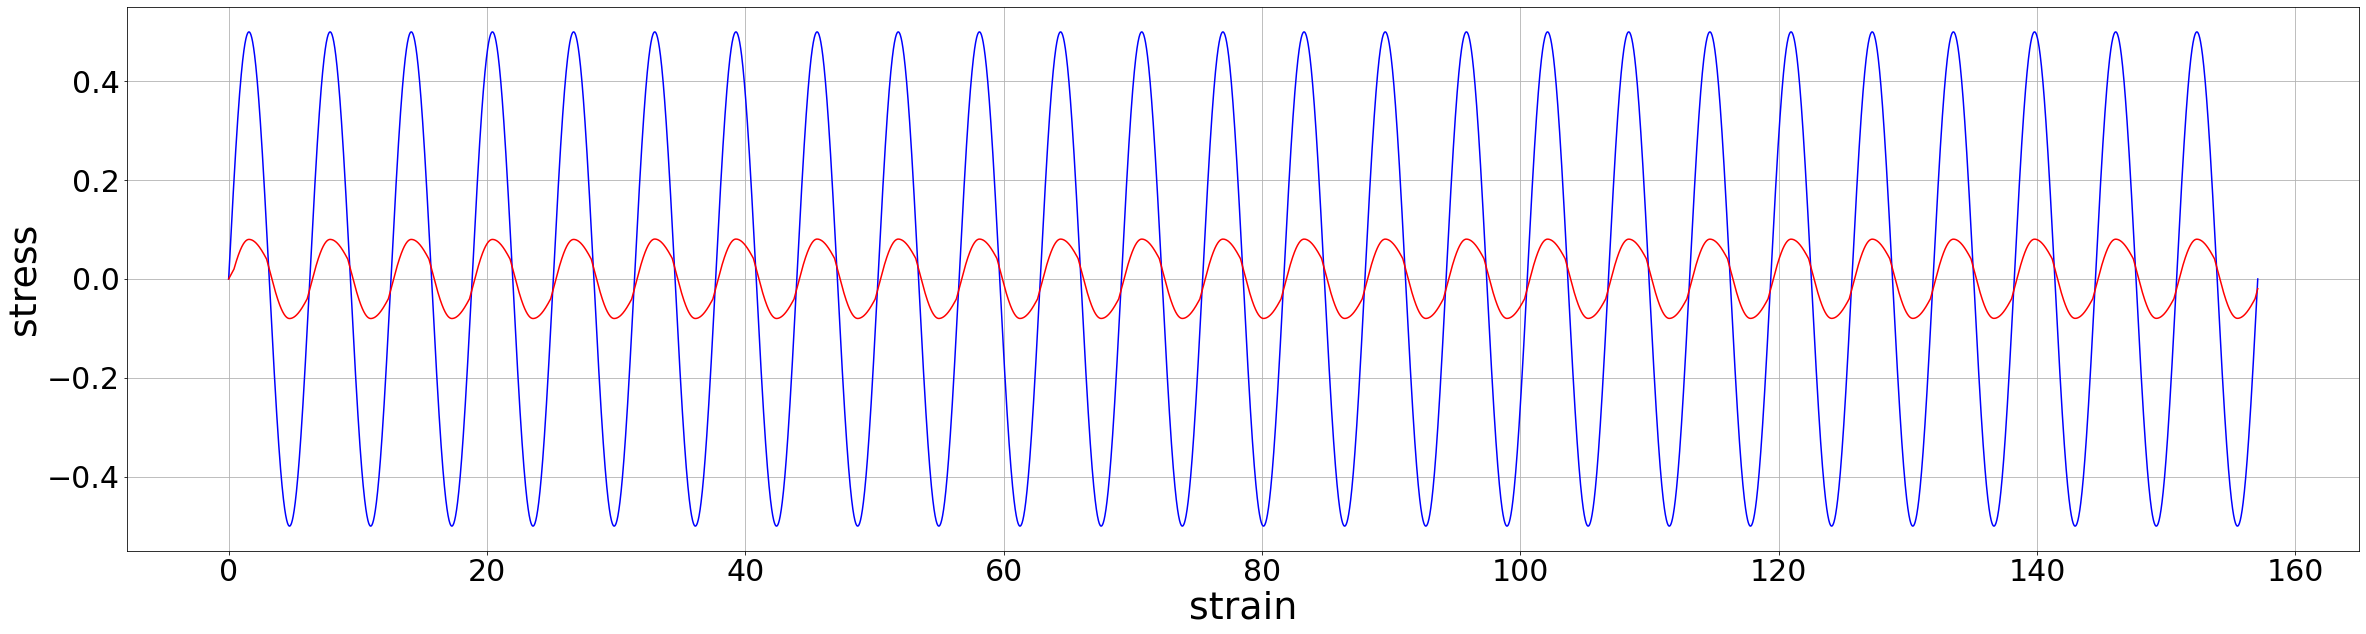

In [399]:
#graph stress and strain
plt.figure(figsize=(40,10))
plt.plot(point,x ,'b')
plt.plot(point,eps ,'r')
plt.xlabel('strain', fontsize= 38)
plt.ylabel('stress', fontsize= 38)
plt.xticks(fontsize= 30)
plt.yticks(fontsize= 30)
plt.grid()
plt.show()

<Figure size 2880x720 with 0 Axes>

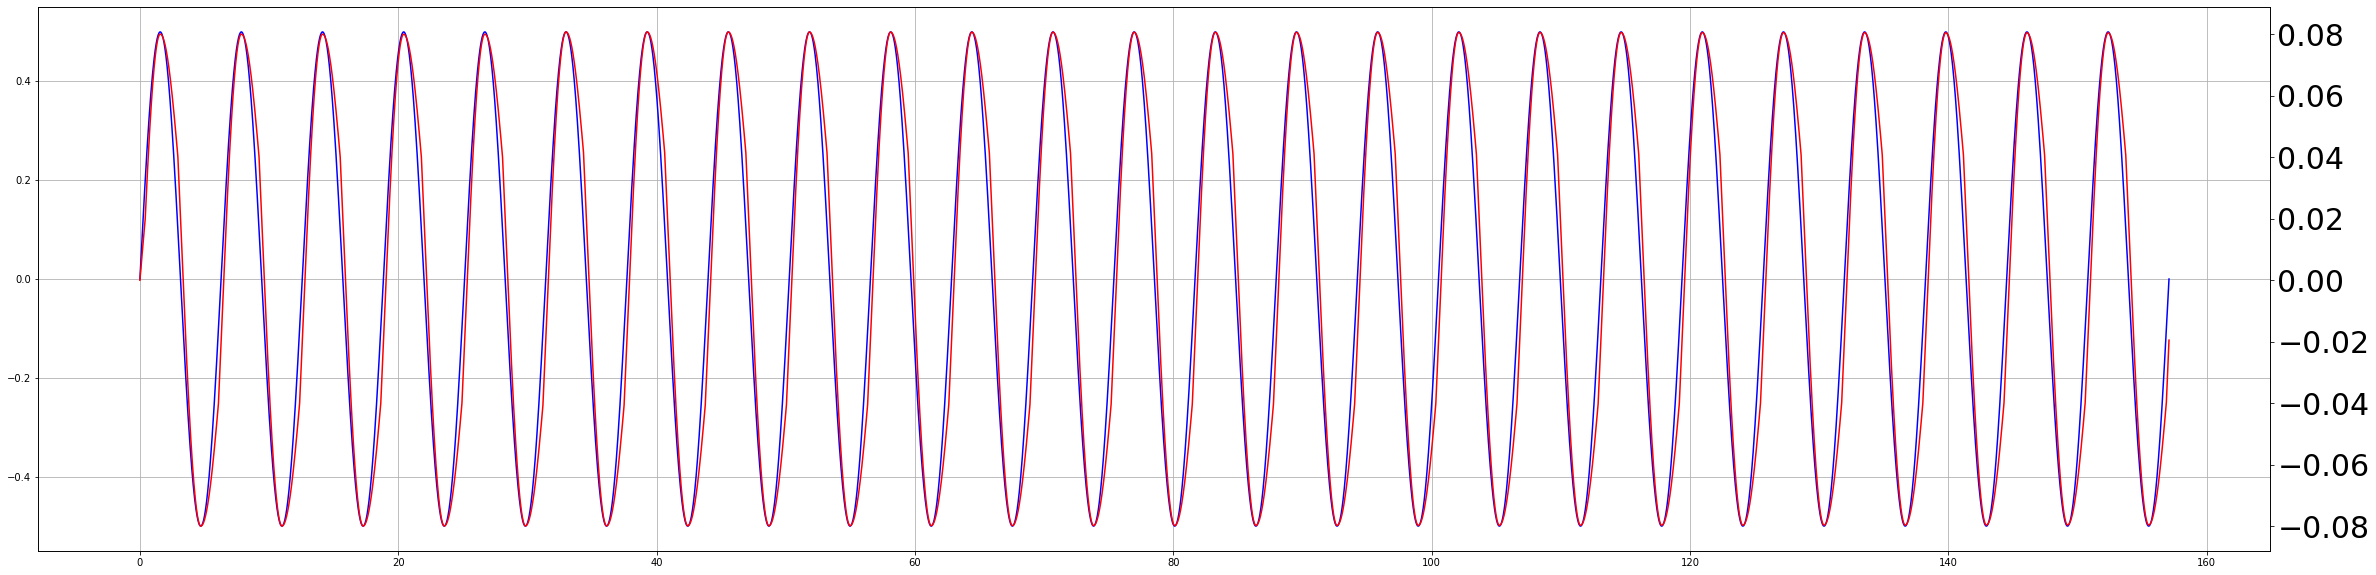

In [495]:
#Visiualization of the shift between the two functions
plt.figure(figsize=(40,10))
fig,ax1 = plt.subplots(figsize=(40,10))
ax2=ax1.twinx()
ax1.plot(point,x ,'b')
ax2.plot(point,eps ,'r')
ax1.grid()
plt.show()

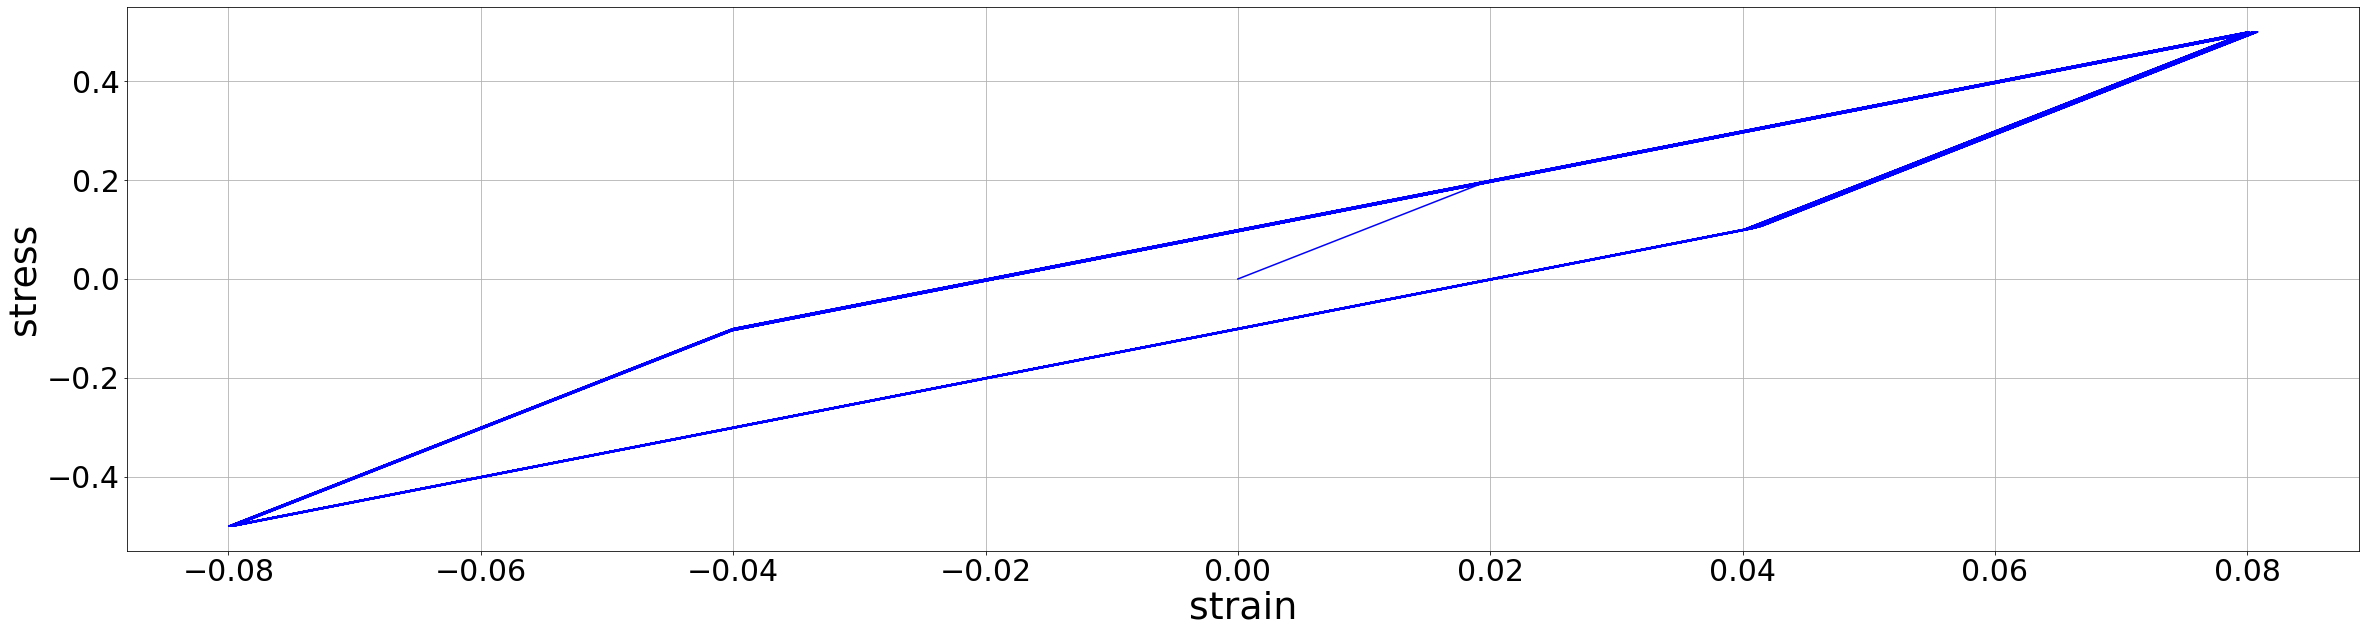

In [401]:
#Stress-strain loops
plt.figure(figsize=(40,10))
plt.plot(eps,x ,'b')
plt.xlabel('strain', fontsize= 38)
plt.ylabel('stress', fontsize= 38)
plt.xticks(fontsize= 30)
plt.yticks(fontsize= 30)
plt.grid()
plt.show()

Frequency Domain: 
Here you convert your signals into the frequency domain (using fft). Then, we find the bin that corresponds to the frequency that we care about and get the angle between the two signals. So, for example, if bin #18 corresponds to our signal's frequency, we'd get the phase lag in radians via phase_rad = angle(fft_y1(18)/fft_y2(18)) or phase_rad = angle(fft_y1(18)-angle_y2(18));. If our signals have a constant frequency, this is an excellent approach because it naturally rejects all noise and interference at other frequencies. We can have really strong interference at one frequency, but we can still cleanly get our signal at another frequency. This technique is not the best for signals that change frequency during the fft analysis window.

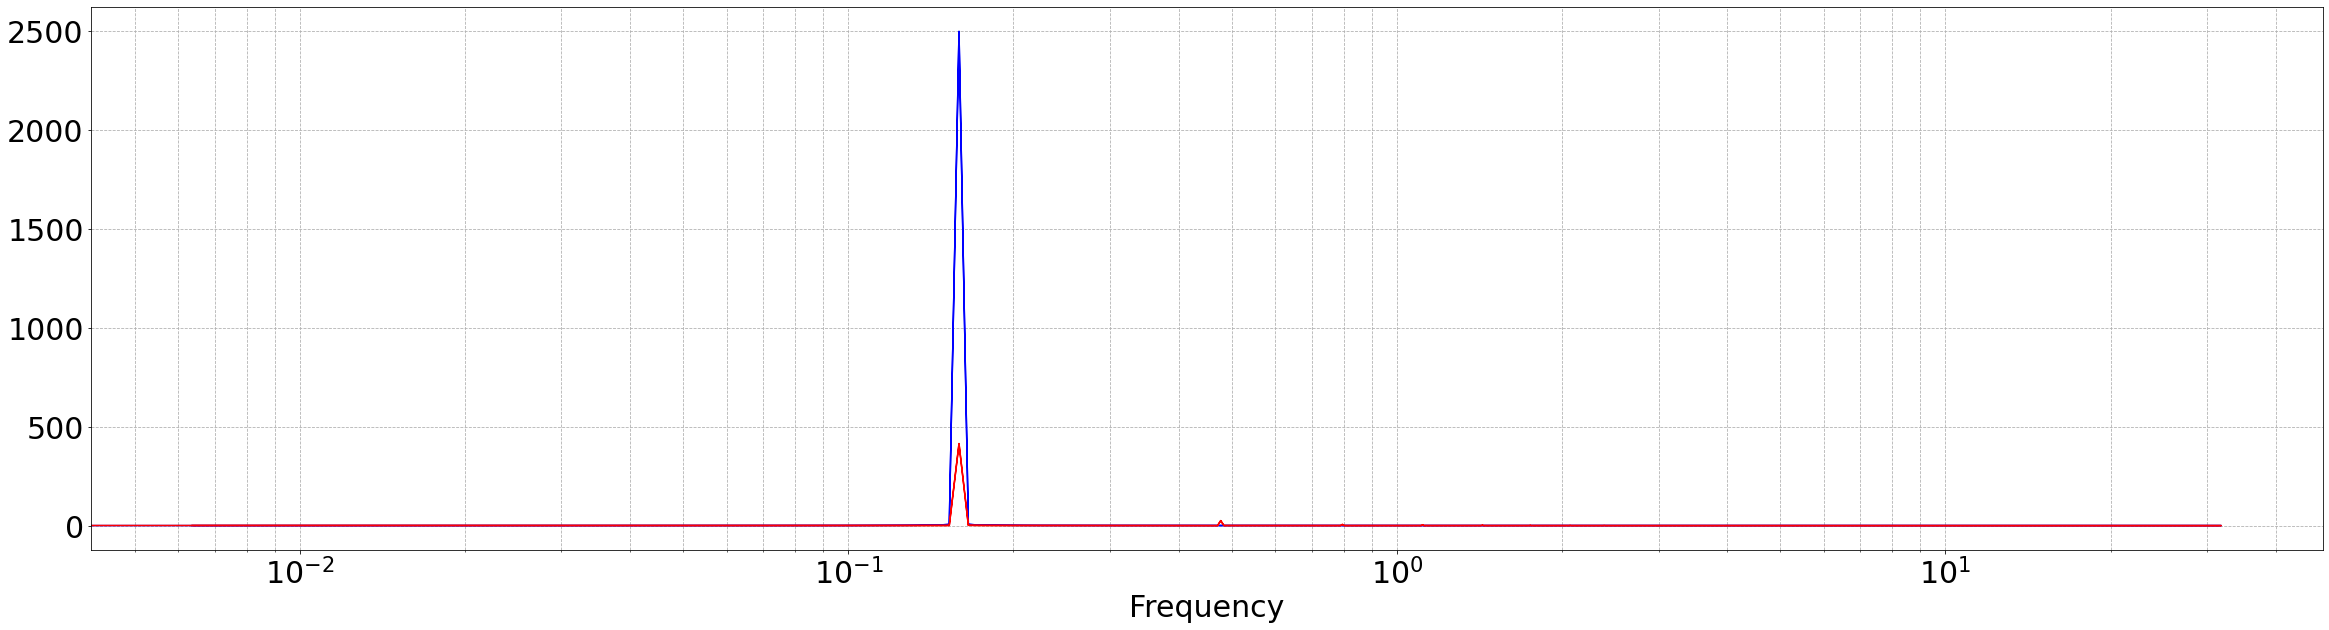

In [402]:
# Number of sample points
N = len(x)
# sample spacing
T= dx
#------FFT---------
fft_f = fft(x)
fft_g= fft(eps)

xf= fftfreq(N,T)
f_ser=pd.Series(fft_f)
g_ser=pd.Series(fft_g)
xf_ser=pd.Series(xf)
f_ser_real= pd.Series(np.real(fft_f))
g_ser_real= pd.Series(np.real(fft_g))
table= pd.concat([xf_ser,f_ser,g_ser,f_ser_real, g_ser_real],join = 'outer', axis = 1)

plt.figure(figsize=(40,10))

plt.plot(np.abs(xf), np.abs(fft_f), 'b')
plt.plot(np.abs(xf), np.abs(fft_g), 'r')
plt.xticks(np.arange(min(np.abs(xf)), max(np.abs(xf)), 0.1))
plt.xlabel('Frequency', fontsize= 30)
plt.xticks(fontsize= 30)
plt.xscale('log')
plt.yticks(fontsize= 30)
plt.grid(True,which="both", linestyle='--')
plt.show()

In [403]:
#Frequency of interest
table.reset_index()
ind1= table[1].iloc[np.where(abs(table[3])==max(abs(table[3])))]
ind2=table[2].iloc[np.where(abs(table[4])==max(abs(table[4])))]
print(ind1, ind2)


25      19.633569-2499.772181j
9975    19.633569+2499.772181j
Name: 1, dtype: complex128 25     -72.691522-408.369338j
9975   -72.691522+408.369338j
Name: 2, dtype: complex128


In [414]:
#Phase shift and dissipation
shift=np.angle((ind1[:1])/(ind2[:1]))
dissip=np.tan(shift)
print('Phase shift:',shift, 'dissipation:',dissip)

Phase shift: [0.18401324] ,dissipation: [0.18611871]
